In [1]:
# Reconnaissance de chiffres avec MNIST sur CPU

# Désactiver l'utilisation des GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Vérification de l'utilisation du CPU
print("TensorFlow utilise le GPU ?" , tf.config.list_physical_devices('GPU'))


2024-12-03 17:09:03.687965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733242143.708701  220087 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733242143.714997  220087 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-03 17:09:03.736636: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow utilise le GPU ? []


2024-12-03 17:09:06.107176: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-12-03 17:09:06.107211: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: VMTranscriboxNvidia
2024-12-03 17:09:06.107218: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: VMTranscriboxNvidia
2024-12-03 17:09:06.107310: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 560.35.3
2024-12-03 17:09:06.107350: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 560.35.3
2024-12-03 17:09:06.107356: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 560.35.3


In [2]:
# Chargement du jeu de données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation des données
x_train = x_train / 255.0
x_test = x_test / 255.0

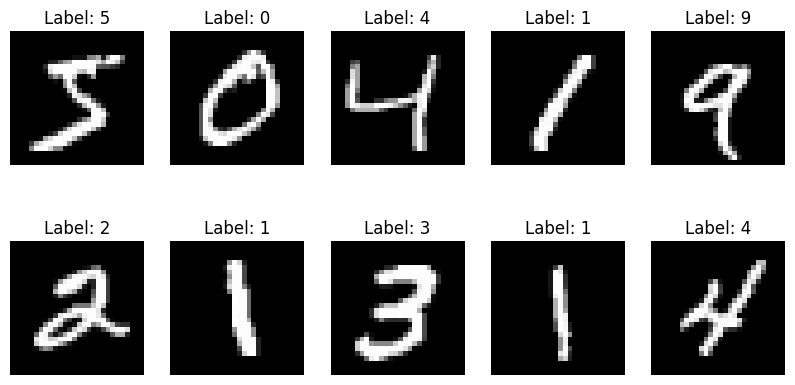

In [3]:
# Affichage de quelques exemples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()



In [4]:
# Construction du modèle
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Transformation en vecteur
    Dense(128, activation='relu'), # Couche dense avec 128 neurones
    Dense(10, activation='softmax') # Couche de sortie avec 10 classes
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




# Affichage de la structure du modèle
model.summary()


/home/azureuser/SourceCode/Lalux/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Entraînement du modèle
print("Entraînement en cours...")
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


Entraînement en cours...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8761 - loss: 0.4304 - val_accuracy: 0.9623 - val_loss: 0.1297
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9669 - loss: 0.1175 - val_accuracy: 0.9713 - val_loss: 0.0945
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0769 - val_accuracy: 0.9706 - val_loss: 0.0941
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9831 - loss: 0.0560 - val_accuracy: 0.9752 - val_loss: 0.0819
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9778 - val_loss: 0.0770


In [6]:
# Évaluation du modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Affichage des courbes de performance
plt.figure(figsize=(12, 5))

313/313 - 0s - 661us/step - accuracy: 0.9778 - loss: 0.0770
Test Accuracy: 0.98


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

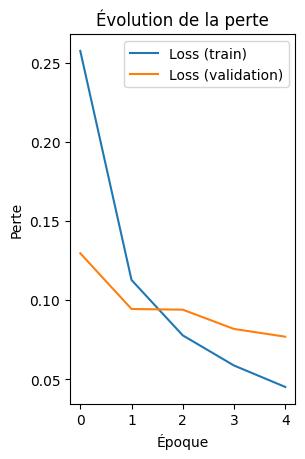

In [7]:
# Courbe de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss (train)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title("Évolution de la perte")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.legend()

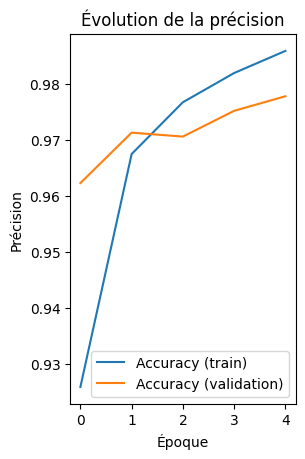

In [8]:
# Courbe de précision
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy (train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.title("Évolution de la précision")
plt.xlabel("Époque")
plt.ylabel("Précision")
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


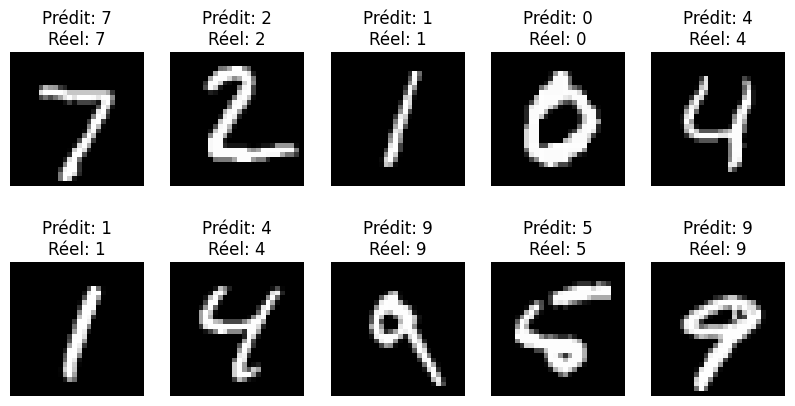

In [9]:
# Prédictions sur quelques exemples
predictions = model.predict(x_test[:10])
predicted_labels = tf.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Prédit: {predicted_labels[i].numpy()}\nRéel: {y_test[i]}")
    plt.axis('off')
plt.show()